In [1]:
!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip
!pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

     \ 21.3MB 650kB/s
  Created wheel for Theano: filename=Theano-1.0.4+unknown-cp36-none-any.whl size=2666765 sha256=fb52cccc5af533f631059df45836834efce301f1d674ac2f729af11c624f59f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5zu16gbe/wheels/33/73/96/0ed263c62a86e2485ea634e0d3ae8169d50fd66e3b252541db
Successfully built Theano
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4
     - 1.1MB 57.3MB/s
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-cp36-none-any.whl size=122797 sha256=70b12d9eea3bc1503dcf7d0ac85079b10a8be2554a8533ac604b387761bc7b7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-aid0len6/wheels/ca/4a/00/87f1777b229481fe76562df7c0cfb993bc88ed0cc37e3f0ed4
Successfully built Lasagne


In [2]:
!git clone https://github.com/jaredleekatzman/DeepSurv.git
%cd DeepSurv
!pip install .

Cloning into 'DeepSurv'...
remote: Enumerating objects: 348, done.
remote: Total 348 (delta 0), reused 0 (delta 0), pack-reused 348
Receiving objects: 100% (348/348), 5.17 MiB | 3.17 MiB/s, done.
Resolving deltas: 100% (163/163), done.
/content/DeepSurv
Processing /content/DeepSurv
     |████████████████████████████████| 419kB 30.2MB/s 
  Created wheel for deepsurv: filename=deepsurv-0.2.1-cp36-none-any.whl size=17198 sha256=d1d90a9dbf5be187ca3d2d39caf7e88d34fc486b30b773d92b1339a963940226
  Stored in directory: /tmp/pip-ephem-wheel-cache-qwn1qpy1/wheels/d7/f8/ce/1a1a234843601ceaee3a41c061d34e640d909f8716eb56e4f1
Successfully built deepsurv


In [3]:
%cd deepsurv

/content/DeepSurv/deepsurv


In [4]:
# Use DeepSurv from the repo
#Supprimer le '.' de .deepsurv_logger dans deep_surv.py
import deep_surv
from deepsurv_logger import DeepSurvLogger, TensorboardLogger


import utils
import viz

import numpy as np
import pandas as pd

import lasagne
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd "/content/gdrive/My Drive/Proj_Owkin/"
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/
/content/gdrive/My Drive/Proj_Owkin
DeepSurv		 test	     wght2.h5  y_train.csv
logs			 test2.json  wght3.h5
Projet_Owkin_V1.ipynb	 test3.json  x_test
submission_owkin_CG.csv  wght	     x_train


In [6]:
import pandas as pd

path = 'x_train/features/clinical_data.csv'
path2 = 'x_train/features/radiomics.csv'
clinical_data = pd.read_csv(path)
radiomics = pd.read_csv(path2)

path3 = 'y_train.csv'
y_train = pd.read_csv(path3)
y_train.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [7]:
radiomics_mod = radiomics
radiomics_mod.iloc[0,0] = radiomics_mod.iloc[1,0]
radiomics_mod = radiomics_mod.rename(columns=radiomics_mod.iloc[0])
radiomics_mod = radiomics_mod[2:]
#Change the type of the columns
radiomics_mod = radiomics_mod.apply(pd.to_numeric)
#Merge radiomics and y_train on PatientID
data = pd.merge(radiomics_mod,y_train, on='PatientID')
clinical_data_mod = clinical_data.drop(['Histology','Mstage', 'Nstage', 'Tstage'], axis=1)
data = pd.merge(data,clinical_data_mod, on='PatientID')
data = data.drop(['PatientID', 'age'], axis=1)
#For sklearn function
data_train_test = data
data = data.drop(['SourceDataset'], axis=1)
data.head()

,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,SurvivalTime,Event
0,0.027815,0.274892,48.559242,1.537964,0.650210,5431.333210,0.275228,19786.0,3.942944e+09,5.138062,1.592466,241.0,-310.858031,288.311105,-266.0,-1006.0,1247.0,446.407319,-0.281714,320.385361,0.037008,102646.779451,1056.843506,546253.499762,-5334.563631,555.818455,54.336816,0.821101,3.845383,5.036775,0.005920,9.270194,0.338672,0.262780,-0.175185,0.901525,0.981053,0.917509,0.249416,0.037768,61.035662,6.007130,0.926391,1.457980,555.378594,14592.303727,0.891330,0.003562,954.749135,0.003384,851.987373,0.004444,1651.710761,1378,0
1,0.023015,0.188210,75.703368,1.744961,0.573079,10369.568729,0.240727,43168.0,3.122890e+09,4.461054,3.371013,262.0,-134.429809,191.395154,-15.0,-945.0,1207.0,268.966000,-1.216062,232.962090,0.080061,54271.335557,1219.689108,331155.230396,-6857.579704,295.032309,16.868781,0.891184,2.984034,2.570017,0.025532,7.551168,0.495719,0.439879,-0.250370,0.932847,0.993282,0.953464,0.340024,0.110575,67.826804,5.255594,0.855154,2.512125,1766.619373,22881.932686,0.766032,0.002246,1092.823724,0.002069,884.838627,0.003633,3386.995589,379,1
2,0.027348,0.265740,70.434367,1.555420,0.642913,10558.818691,0.200766,52655.0,1.059535e+09,3.437111,7.585494,115.0,-54.136093,94.132136,2.0,-785.0,900.0,141.852795,-2.153344,131.116356,0.160905,17191.498865,972.465798,54523.086867,-1618.363118,78.183970,7.040623,0.831081,2.333939,1.496020,0.066569,5.686554,0.616607,0.581458,-0.249969,0.884911,0.995095,0.963887,0.379957,0.189723,61.795144,4.159019,0.769265,4.096838,3462.816344,18773.106002,0.644554,0.001880,878.989601,0.001635,634.910036,0.004869,4232.418080,573,1
3,0.026811,0.255406,46.818800,1.576120,0.634469,4221.412123,0.323878,13074.0,6.583324e+08,4.352564,4.281865,274.0,-118.705522,149.072998,-37.0,-850.0,1124.0,224.397694,-1.437836,190.429315,0.074476,36263.324022,968.117567,166735.779994,-3968.921514,184.299591,13.656782,0.860096,2.926791,2.492079,0.015048,7.536161,0.457545,0.391681,-0.214233,0.902811,0.993509,0.950374,0.357236,0.050439,60.841486,5.122729,0.880123,1.824328,683.869792,7978.285176,0.828138,0.002855,907.045929,0.002680,774.885387,0.003901,1844.746046,959,0
4,0.023691,0.199424,53.795911,1.711620,0.584242,5295.900331,0.327241,16237.0,8.072532e+08,4.055700,8.999616,203.0,-67.201946,143.210231,14.0,-1023.0,1226.0,222.972850,-2.438490,212.604774,0.104419,45200.790098,1594.558416,658805.553990,-10509.915485,248.373464,20.121147,0.849653,2.7

In [140]:
clinical_data_mod.head()

,PatientID,SourceDataset,age
0,202,l2,66.0000
1,371,l1,64.5722
2,246,l1,66.0452
3,240,l1,59.3566
4,284,l1,71.0554


In [0]:
#Train/Test
from sklearn.model_selection import train_test_split
seed = 10
X_train, X_test = train_test_split(data_train_test, test_size = 0.2, stratify = data_train_test[['SourceDataset']], random_state=seed)

In [0]:
data_train = X_train.drop(['SourceDataset'], axis=1)
data_test = X_test.drop(['SourceDataset'], axis=1)

In [0]:
#Otherwise problem when we concatenate SurvT and Event later
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

SurvT = data_train['SurvivalTime']
Event = data_train['Event']

SurvT_test = data_test['SurvivalTime']
Event_test = data_test['Event']

data_train = data_train.drop(['SurvivalTime','Event'], axis=1)
data_test = data_test.drop(['SurvivalTime','Event'], axis=1)
"""
from sklearn.preprocessing import normalize
data_train_n = normalize(data_train, norm='l2', axis=0, copy=True, return_norm=False)
data_test_n = normalize(data_test, norm='l2', axis=0, copy=True, return_norm=False)
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train_n = scaler.fit_transform(data_train)
data_test_n = scaler.fit_transform(data_test)


data_train = pd.DataFrame(data_train_n, columns=data_train.columns)
data_test = pd.DataFrame(data_test_n, columns=data_test.columns)

data_train['SurvivalTime'] = SurvT
data_train['Event'] = Event

data_test['SurvivalTime'] = SurvT_test
data_test['Event'] = Event_test


In [0]:
# event_col is the header in the df that represents the 'Event / Status' indicator
# time_col is the header in the df that represents the event time
def dataframe_to_deepsurv_ds(df, event_col = 'Event', time_col = 'Time'):
    # Extract the event and time columns as numpy arrays
    e = df[event_col].values.astype(np.int32)
    t = df[time_col].values.astype(np.float32)

    # Extract the patient's covariates as a numpy array
    x_df = df.drop([event_col, time_col], axis = 1)
    x = x_df.values.astype(np.float32)
    
    # Return the deep surv dataframe
    return {
        'x' : x,
        'e' : e,
        't' : t
    }

# If the headers of the csv change, you can replace the values of 
# 'event_col' and 'time_col' with the names of the new headers
train_data = dataframe_to_deepsurv_ds(data_train, event_col = 'Event', time_col= 'SurvivalTime')
test_data = dataframe_to_deepsurv_ds(data_test, event_col = 'Event', time_col= 'SurvivalTime')

In [0]:
hyperparams = {
    'L2_reg': 32,
    'batch_norm': True,
    'dropout': 0.5,
    'hidden_layers_sizes': [35,35,12],
    'learning_rate': 1e-03,
    'lr_decay': 0.01,
    'momentum': 0.8,
    'n_in': train_data['x'].shape[1],
    'standardize': False
}

In [0]:
# Create an instance of DeepSurv using the hyperparams defined above
model = deep_surv.DeepSurv(**hyperparams)

experiment_name = 'test_experiment_sebastian'
logdir = './logs/tensorboard/'
logger = TensorboardLogger(experiment_name, logdir=logdir)

# Now we train the model
update_fn=lasagne.updates.amsgrad 
#update_fn=lasagne.updates.nesterov_momentum # The type of optimizer to use. \
                                            # Check out http://lasagne.readthedocs.io/en/latest/modules/updates.html \
                                            # for other optimizers to use
n_epochs = 2000

# If you have validation data, you can add it as the second parameter to the function
metrics = model.train(train_data, test_data, n_epochs=n_epochs, validation_frequency = 1, logger=logger, update_fn=update_fn, patience = 2500, verbose = False)

In [0]:
model.save_model("test3.json", weights_file="wght3.h5")

Train C-Index: (1999, 0.7283031886057858)
Valid C-Index: (1999, 0.676759410801964)


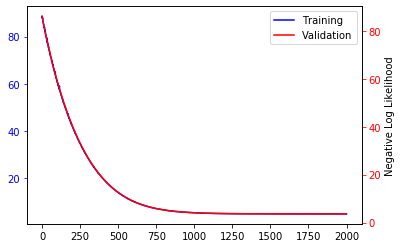

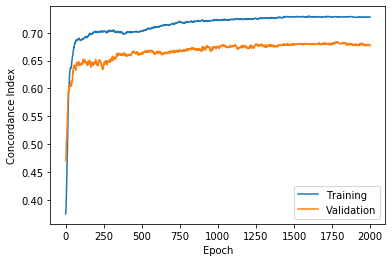

In [24]:
# Print the final metrics
print('Train C-Index:', metrics['c-index'][-1])
print('Valid C-Index:',metrics['valid_c-index'][-1])

viz.plot_log(metrics)

In [28]:
path = 'x_test/features/clinical_data.csv'
path2 = 'x_test/features/radiomics.csv'
clinical_data = pd.read_csv(path)
radiomics = pd.read_csv(path2)

radiomics_mod = radiomics
radiomics_mod.iloc[0,0] = radiomics_mod.iloc[1,0]
radiomics_mod = radiomics_mod.rename(columns=radiomics_mod.iloc[0])
radiomics_mod = radiomics_mod[2:]
#Change the type of the columns
radiomics_mod = radiomics_mod.apply(pd.to_numeric)
clinical_data_mod = clinical_data.drop(['Histology','Mstage', 'Nstage', 'Tstage'], axis=1)
data = pd.merge(radiomics_mod,clinical_data_mod, on='PatientID')
patientID = data['PatientID']
data = data.drop(['PatientID', 'age'], axis=1)
#For sklearn function
data_train_test = data
data = data.drop(['SourceDataset'], axis=1)
data.head()
#Supprimer patientID

,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_DifferenceAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Id,original_glcm_Idm,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idmn,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glrlm_ShortRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
0,0.028885,0.296451,106.901824,1.499738,0.666783,29085.541425,0.114528,254069.0,2.006942e+09,3.073901,14.142104,765.0,16.933707,44.923384,19.0,-654.0,1419.0,88.877457,-0.701919,87.249366,0.201985,7612.451871,810.133656,21777.734066,-49.637453,38.349991,2.733885,0.865405,1.799077,0.914393,0.082816,5.048950,0.687668,0.666545,-0.306548,0.906520,0.999197,0.984980,0.417331,0.193666,56.611982,3.872300,0.686184,5.786839,21219.447221,64776.697579,0.567095,0.001493,808.353957,0.001094,554.111998,0.007535,4654.031976
1,0.031948,0.362660,18.814888,1.402276,0.713126,629.443640,0.703879,911.0,2.623938e+08,5.206990,2.057162,60.0,-479.029638,204.396300,-479.0,-992.0,1052.0,536.682716,0.041489,241.989554,0.028924,58558.944237,579.895336,229171.445706,-765.995686,325.752484,49.740401,0.734499,3.803408,5.612222,0.002095,9.139372,0.257633,0.165967,-0.244386,0.957683,0.974940,0.891016,0.173590,0.006783,45.199122,6.059859,0.966275,1.160397,25.291608,795.675280,0.953475,0.011646,548.964573,0.010836,529.644029,0.015633,639.621963
2,0.015999,0.090945,105.080921,2.223687,0.449704,12509.265444,0.315298,39809.0,6.650322e+08,3.262327,17.726780,169.0,-23.682308,76.920794,19.0,-1019.0,1188.0,129.250048,-3.433133,127.061887,0.177325,16144.723182,1685.733219,145633.065864,-2863.528576,84.995985,7.890843,0.829166,2.250888,1.428105,0.070042,5.533082,0.633986,0.603222,-0.241592,0.873649,0.996769,0.973099,0.392381,0.192881,81.644318,4.055586,0.763929,4.064385,3225.808332,14007.509285,0.644247,0.001171,1600.952265,0.001003,1181.377774,0.003027,7156.937667
3,0.031358,0.349373,46.968074,1.419832,0.704309,4067.657372,0.282104,14458.0,3.754287e+08,3.589861,14.145887,422.0,-31.550768,91.616295,15.0,-990.0,1412.0,161.142331,-3.133562,158.023416,0.138235,24971.400003,1582.584241,275939.432280,-5124.093237,139.276676,12.627536,0.832694,2.489973,1.859968,0.039920,6.253236,0.575949,0.538017,-0.239166,0.890556,0.996313,0.970611,0.414928,0.118059,78.763414,4.470239,0.791925,2.902586,1147.928170,6094.805584,0.711467,0.002104,1533.217788,0.001900,1182.876363,0.003685,4776.549408
4,0.017815,0.112759,56.542020,2.069901,0.483115,7093.365690,0.376032,18942.0,9.108915e+09,5.067418,3.645805,336.0,-648.072748,194.227188,-720.0,-1024.0,1360.0,693.458403,1.108723,246.751433,0.037058,60886.269547,327.830300,414004.334930,6575.989794,338.199701,72.888824,0.646720,4.129335,6.290405,0.001831,9.813896,0.262449,0.175369,-0.087

In [0]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
data_test_n = scaler2.fit_transform(data)

data = pd.DataFrame(data_test_n, columns=data.columns)


In [0]:
data['SurvivalTime'] = 0
data['Event'] = 0

In [0]:
# event_col is the header in the df that represents the 'Event / Status' indicator
# time_col is the header in the df that represents the event time
def dataframe_to_deepsurv_ds(df, event_col = 'Event', time_col = 'Time'):
    # Extract the event and time columns as numpy arrays
    e = df[event_col].values.astype(np.int32)
    t = df[time_col].values.astype(np.float32)

    # Extract the patient's covariates as a numpy array
    x_df = df.drop([event_col, time_col], axis = 1)
    x = x_df.values.astype(np.float32)
    
    # Return the deep surv dataframe
    return {
        'x' : x,
        'e' : e,
        't' : t
    }

# If the headers of the csv change, you can replace the values of 
# 'event_col' and 'time_col' with the names of the new headers
# You can also use this function on your training dataset, validation dataset, and testing dataset
test_data_owk = dataframe_to_deepsurv_ds(data, event_col = 'Event', time_col= 'SurvivalTime')

In [0]:
val = model.predict_risk(test_data_owk['x'])

In [0]:
#To have floats
#We don't have
val = ((-1*val)+1)*100

In [0]:
val_pd = pd.DataFrame(val, columns=['SurvivalTime'])
val_pd['PatientID'] = patientID

nan_value = float("NaN")
val_pd["Event"] = nan_value

val_pd = val_pd.reindex(columns = ['PatientID', 'SurvivalTime', 'Event'])

In [0]:
export_csv = val_pd.to_csv (r'sub_2_CG.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [43]:
val_pd

,PatientID,SurvivalTime,Event
0,13,101.588842,NaN
1,155,97.534976,NaN
2,404,100.812089,NaN
3,407,100.413242,NaN
4,9,95.761406,NaN
...,...,...,...
120,66,101.196855,NaN
121,132,101.912525,NaN
122,169,98.479565,NaN
123,199,100.659331,NaN
